# Notes
Learnings from this lesson are documented here

* An image recongnizer can be used to classify the sounds/audio, took sounds, took waveforms pictures in the phone and used to classify the sounds 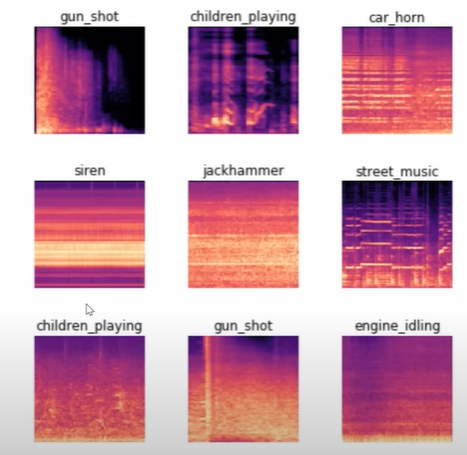

* pictures from the mouse movements are lines, dots are the clicks and speed of the movements is colours
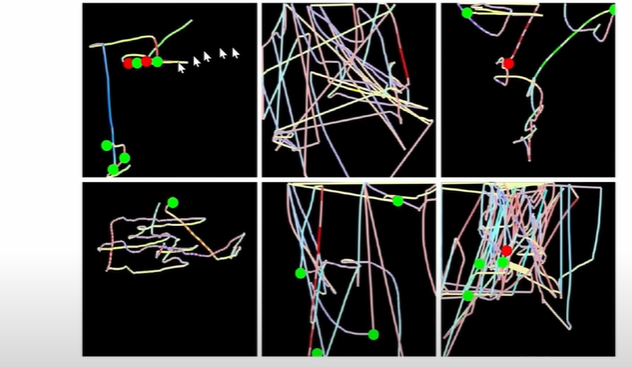

* Transfer Learning, used to train models on some data set and used to predict on some other dataset
* Fastai is library is on top of Pytorch, like Pandas on top of Numpy

* !pip list : is the bash command , starting with '!'

* Pix spy : to check the RGB colour code values for a given picture

* DATA BLOCK : 

# Install required packages

In [8]:
!pip install -Uqq fastai
!pip install -Uqq fastai duckduckgo_search

In [9]:
# !pip install -Uqq torchvision
# !pip install  kaggle

# Libraries
## Below code runs in Kaggle

In [10]:
import pandas as pd

In [11]:
from duckduckgo_search import DDGS
from fastcore.all import * 


In [12]:
 
def search_images(term, max_images=30):
    global image_urls, search_results
    print(f"searching for '{term}'")
    
    with DDGS() as ddgs:
        search_results = ddgs.images(keywords=term)       
        image_urls = [result.get("image") for result in search_results[:max_images]]  
        # convert to L (functionally extended list class from fastai)
        return L(image_urls)

#     return L(DDGS(term, max_results=max_images)).itemgot('image')

In [13]:
# searching for a bird photo
DDGS()
urls = search_images('bird photos', max_images=10)
urls[0]

searching for 'bird photos'


'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

In [14]:
image_urls

['https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg',
 'https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?cs=srgb&dl=green-bird-1661179.jpg&fm=jpg',
 'http://www.voidphase.com/media/2010/12/bird_gouldian_finch_1920.jpg',
 'https://images.pexels.com/photos/97533/pexels-photo-97533.jpeg?cs=srgb&dl=animal-avian-bird-97533.jpg&fm=jpg',
 'https://wallpaperaccess.com/full/775987.jpg',
 'https://images.alphacoders.com/492/492674.jpg',
 'http://upload.wikimedia.org/wikipedia/commons/9/9b/Eastern_Bluebird-27527-2.jpg',
 'https://i2.wp.com/earthnworld.com/wp-content/uploads/2015/11/Blue-Jay.jpg?ssl=1',
 'http://upload.wikimedia.org/wikipedia/commons/5/54/Eastern_Bluebird-27527-7.jpg',
 'https://hdqwalls.com/wallpapers/colorful-parrot-bird.jpg']

In [15]:
search_results[0]

{'title': '1000+ Beautiful Exotic Birds Photos · Pexels · Free Stock Photos',
 'image': 'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg',
 'thumbnail': 'https://tse1.mm.bing.net/th?id=OIP.3hTkhdPZ8PRL3R6saGGNAgHaE7&pid=Api',
 'url': 'https://www.pexels.com/search/exotic birds/',
 'height': 1333,
 'width': 2000,
 'source': 'Bing'}

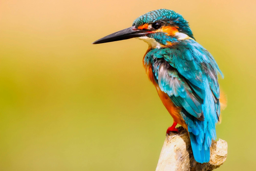

In [16]:
# download the URL and look 

from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=True)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

searching for 'forest photos'


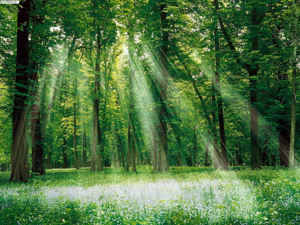

In [17]:
# same as above for forest

download_url(search_images('forest photos',max_images=1)[0], 'forest.jpg', show_progress=True)
Image.open('forest.jpg').to_thumb(300,300)

In [18]:
searches = 'bird', 'forest'
path = Path('bird_or_not')

from time import sleep

for o in searches:
    dest = path/o
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(5)
    
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(5)
    
    download_images(dest,urls=search_images(f'{o} shade photo'))
    sleep(5)
    
    resize_images(path/o, max_size=400, dest=path/o)

searching for 'bird photo'
searching for 'bird sun photo'
searching for 'bird shade photo'
searching for 'forest photo'
searching for 'forest sun photo'
searching for 'forest shade photo'


c:\Users\INDHRNA\Desktop\ML_Practical\Practical_Deep_learning\Practical_Deep_learning\.venv\lib\site-packages\curl_cffi\aio.py:204: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")


In [19]:


failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#6) [None,None,None,None,None,None]

In [20]:
failed

(#6) [Path('bird_or_not/bird/2eadd9e9-78db-41ac-9179-891746357c79.jpg'),Path('bird_or_not/bird/4687c900-71f5-48ac-ac1a-c65201cab413.jpg'),Path('bird_or_not/bird/63947d06-b4c6-464a-9666-357b1c5a840c.jpg'),Path('bird_or_not/bird/993db863-9331-4630-b5dc-6d76bf804397.png'),Path('bird_or_not/bird/a0aebf46-9cad-4d90-bfe5-814fc62c1ea1.jpg'),Path('bird_or_not/forest/1dd8afd9-4e81-46dd-aac2-879145271ef7.jpg')]

In [21]:
len(failed)

6

# MODEL TRAINING
to train a model, we need DATA LOADERS, which is an object that contiains a training set - the images used to create a model, and a validation set - the images used to check the accuracy of a model -- not used during training. 
In FASTAI we can create that easily using a DATABLOCK and view sample images from it :

In [28]:
ImageBlock

<function fastai.vision.data.ImageBlock(cls: 'PILBase' = <class 'fastai.vision.core.PILImage'>)>

In [23]:
dls = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=143),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
)
dls=dls.dataloaders(path)



In [25]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.313252,1.625459,0.466667,00:03


epoch,train_loss,valid_loss,error_rate,time
0,1.374444,1.237329,0.433333,00:05
1,1.006238,0.804773,0.366667,00:05
2,0.777615,0.475901,0.166667,00:05


In [27]:
birdie, _, probs = learn.predict(PILImage.create('bird.jpg'))
birdie, probs

('bird', tensor([1.0000e+00, 3.0469e-07]))

In [29]:
## changes 22